# Pass Task - 1

## Part  - I

Load data from digitData2.csv file. The last column of each file presents the label and the rest of
the columns are features.

1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.

2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the
previous problem. Report performances using appropriate evaluation metrics. Compare the
results.

3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again,
compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if
any).

4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples"
value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or
differences that you have found between two solutions.

# Part - I (Solutions)

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd
#data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [3]:
# load the dataset (digitData2.csv) using pandas
digitData = pd.read_csv('digitData2.csv', header=None)
org_digitData = digitData.copy()

In [4]:
org_digitData

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7.0
1524,0.0,0.0,9.0,9.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,16.0,11.0,1.0,0.0,5.0
1525,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,4.0
1526,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4.0


### Define label and features variable in data.

In [5]:
digitData.columns=["feature_"+str(i+1) for i in range(digitData.shape[1])]
digitData.columns = [*digitData.columns[:-1], 'Label']
digitData

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,Label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7.0
1524,0.0,0.0,9.0,9.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,16.0,11.0,1.0,0.0,5.0
1525,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,4.0
1526,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4.0


Insights : 
1. 1528 observations are recorded.
2. 64 features are present.
3. 1 targer or label variable is defined.

In [6]:
# Split the X values and Y_true value from the dataset
X=digitData.iloc[:,0:-1]
y_true=digitData.iloc[:,-1]

In [7]:
digitData_describe_data = digitData.describe()
digitData_describe_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,Label
count,1528.0,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,0.0,0.298429,5.186518,11.748037,11.886126,5.910340,1.452225,0.140052,0.006545,2.003272,...,0.221204,0.000654,0.273560,5.545157,12.121073,12.046466,7.107330,2.258508,0.414921,4.479712
std,0.0,0.883493,4.765341,4.311237,4.275100,5.695086,3.443292,1.055757,0.102153,3.152839,...,1.013734,0.025582,0.890042,5.103056,4.380002,4.834233,5.962797,4.279441,1.998844,2.863332
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,7.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,13.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,14.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [8]:
digitData_describe_data_transpose = digitData_describe_data.transpose()
digitData_describe_data_transpose = digitData_describe_data_transpose.drop(['count'], axis=1)
digitData_describe_data_transpose

,mean,std,min,25%,50%,75%,max
feature_1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
feature_2,0.298429,0.883493,0.0,0.0,0.0,0.0,8.0
feature_3,5.186518,4.765341,0.0,1.0,4.0,9.0,16.0
feature_4,11.748037,4.311237,0.0,10.0,13.0,15.0,16.0
feature_5,11.886126,4.275100,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...
feature_61,12.046466,4.834233,0.0,10.0,14.0,16.0,16.0
feature_62,7.107330,5.962797,0.0,0.0,7.0,13.0,16.0
feature_63,2.258508,4.279441,0.0,0.0,0.0,2.0,16.0
feature_64,0.414921,1.998844,0.0,0.0,0.0,0.0,16.0


Reason to drop 'count' since it not much help in data cleaning process.

### Bar plot

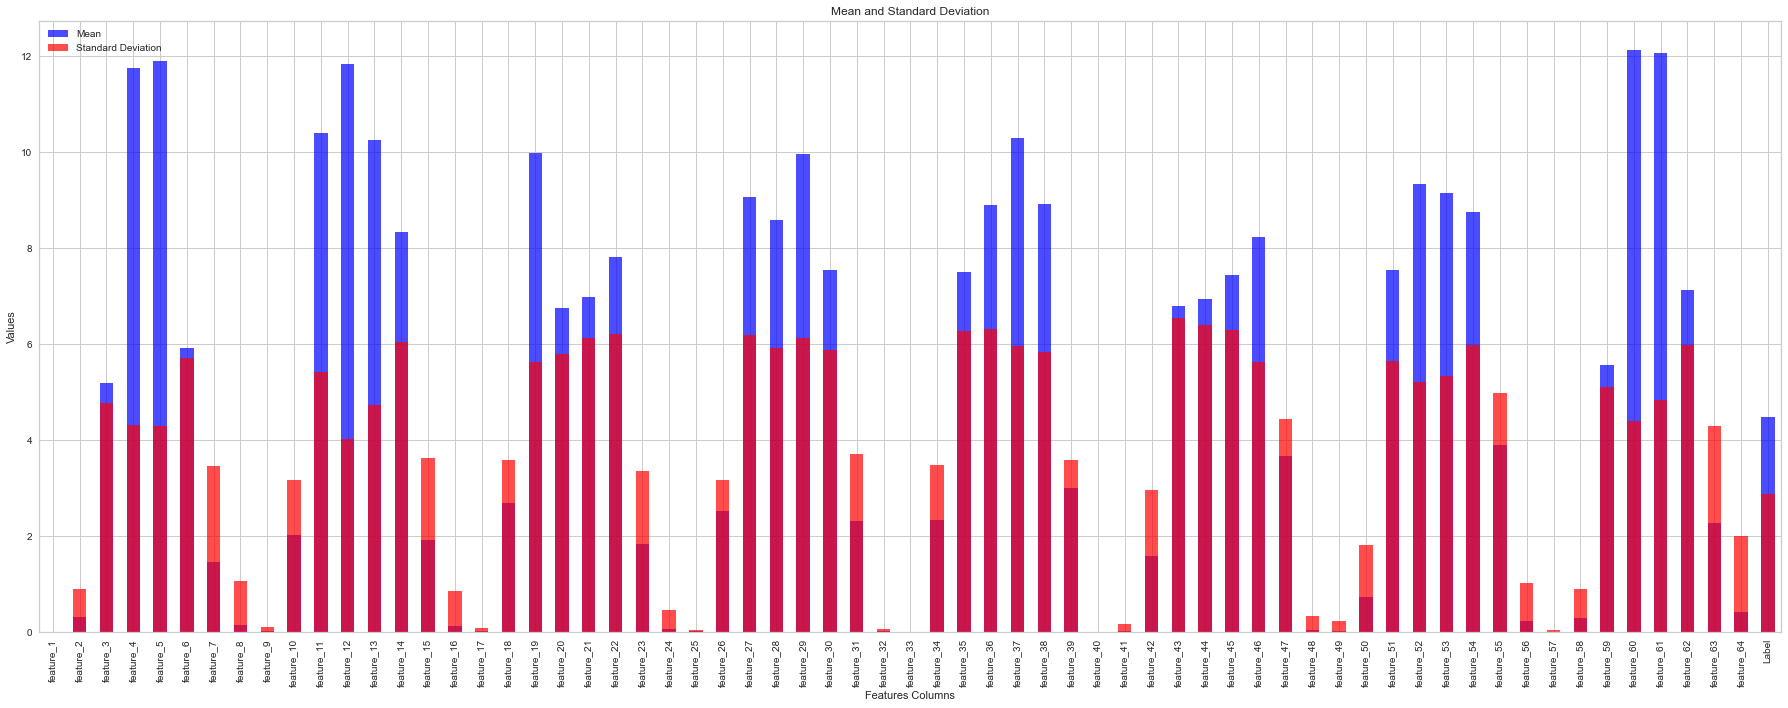

In [9]:
plt.figure(figsize=(25, 10))
digitData_describe_data_transpose['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Mean')
digitData_describe_data_transpose['std'].plot(kind='bar', color='red', alpha=0.7, label='Standard Deviation')
plt.xlabel('Features Columns')
plt.ylabel('Values')
plt.title('Mean and Standard Deviation')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Hist plot

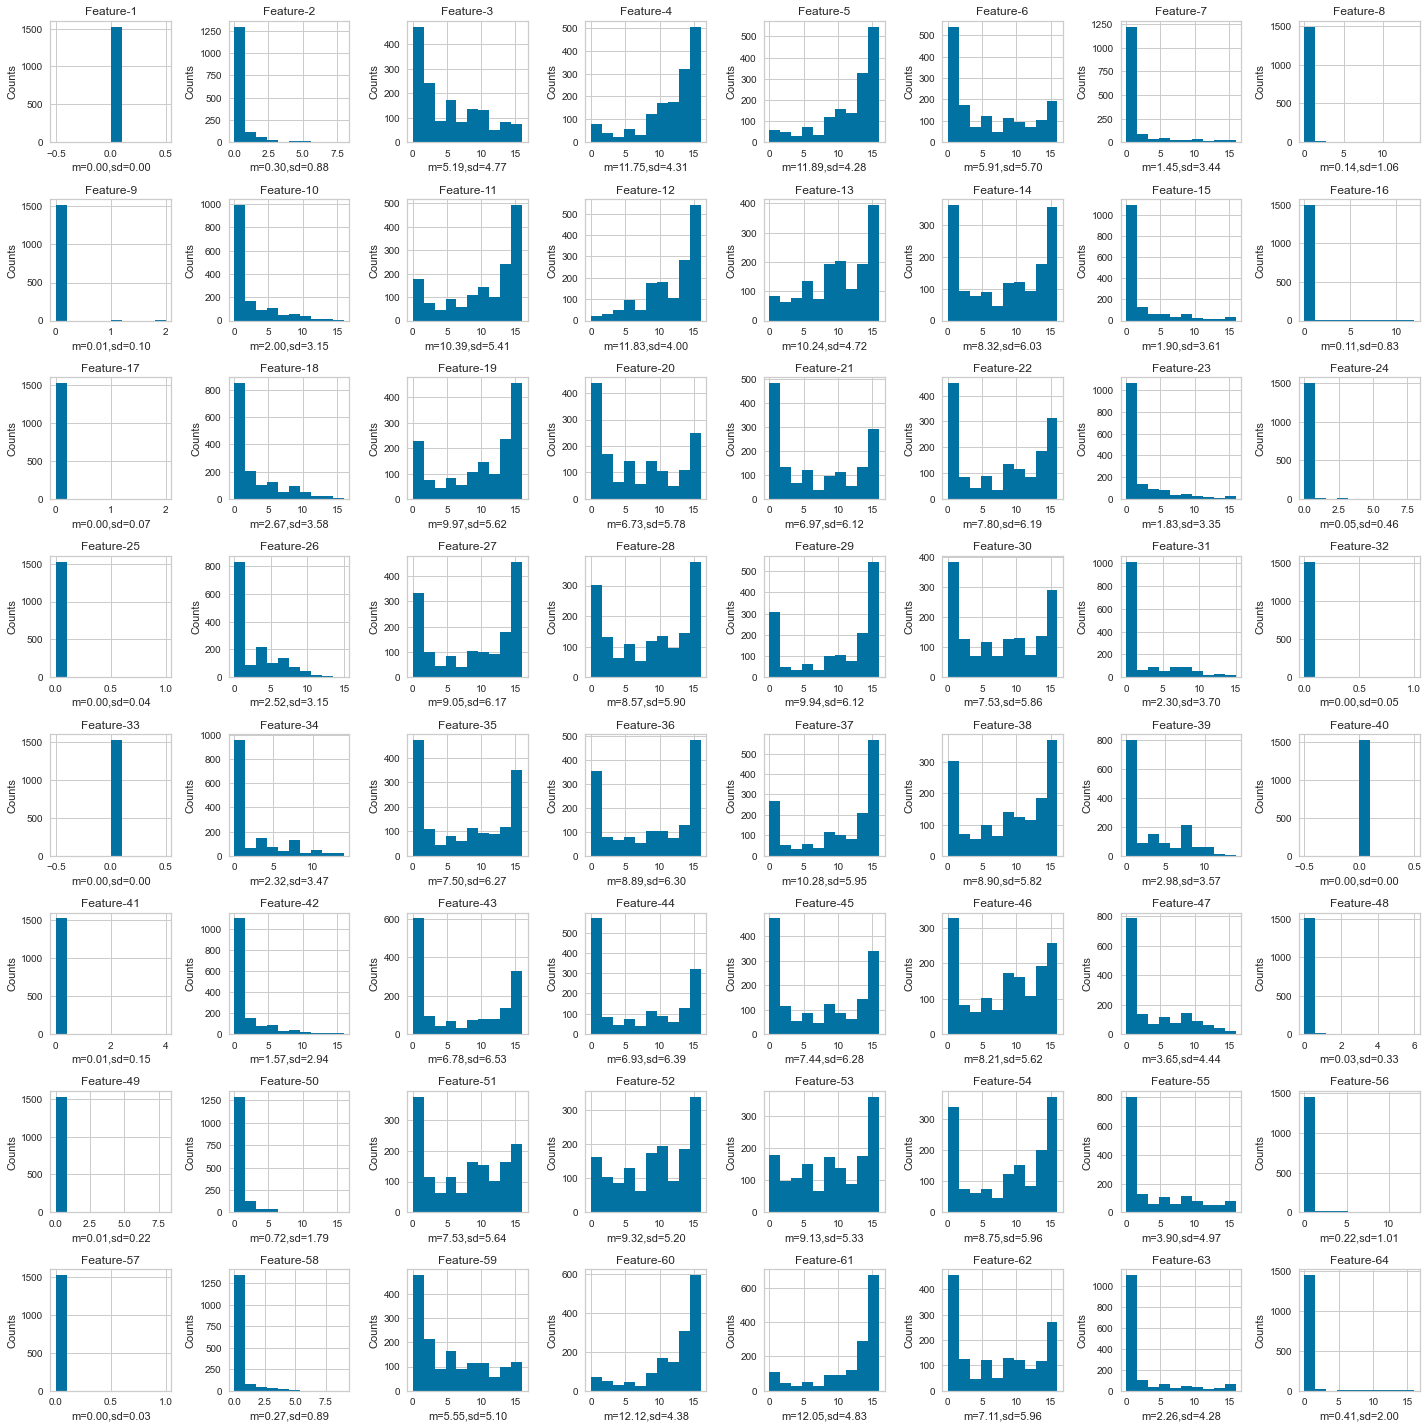

In [10]:
low_variance_feature = []
avg_variance_feature = []
# Create the 8x8 subplot grid
fig, ax = plt.subplots(8, 8, figsize=(20, 20))

# Iterate through the columns and plot histograms in subplots
for i, feature in enumerate(X.columns, 1):
    # Calculate the subplot index based on the current iteration
    row = (i - 1) // 8
    col = (i - 1) % 8
    std_value = digitData[feature].describe()[2]
    mean_value = digitData[feature].describe()[1]
    if (std_value < 0.3):
        low_variance_feature.append(feature)
    elif (std_value > 0.3 and std_value < 1):
        avg_variance_feature.append(feature)

    # Plot the histogram on the specified subplot
    ax[row, col].hist(digitData[feature])
    ax[row, col].set_title(f'Feature-{i}')
    ax[row, col].set_xlabel( f'm={mean_value:.2f},sd={std_value:.2f}')
    ax[row, col].set_ylabel('Counts')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
low_variance_feature, avg_variance_feature

(['feature_1',
  'feature_9',
  'feature_17',
  'feature_25',
  'feature_32',
  'feature_33',
  'feature_40',
  'feature_41',
  'feature_49',
  'feature_57'],
 ['feature_2', 'feature_16', 'feature_24', 'feature_48', 'feature_58'])

In [12]:
cleaned_digitData = digitData.drop(low_variance_feature, axis=1)
cleaned_digitData = cleaned_digitData.drop(avg_variance_feature, axis=1)
cleaned_digitData

,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_12,feature_13,...,feature_54,feature_55,feature_56,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,Label
0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,13.0,15.0,10.0,...,12.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,11.0,16.0,...,6.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,4.0,15.0,12.0,0.0,0.0,0.0,3.0,16.0,15.0,...,11.0,5.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,7.0,15.0,13.0,1.0,0.0,0.0,8.0,13.0,6.0,15.0,...,14.0,9.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,...,10.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,3.0,13.0,16.0,15.0,6.0,0.0,0.0,13.0,13.0,9.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7.0
1524,9.0,9.0,12.0,12.0,0.0,0.0,0.0,14.0,10.0,8.0,...,11.0,8.0,0.0,10.0,16.0,16.0,11.0,1.0,0.0,5.0
1525,0.0,9.0,10.0,0.0,0.0,0.0,0.0,3.0,16.0,4.0,...,1.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,4.0
1526,2.0,15.0,5.0,0.0,0.0,0.0,0.0,9.0,15.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4.0


### 1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.


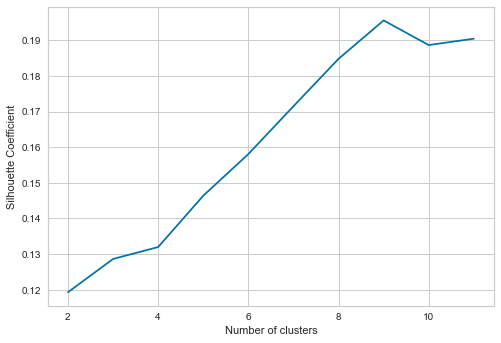

In [13]:
# Plot within-cluster sum of square.

sc_score = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
    kmeans.fit(cleaned_digitData.iloc[:, :-1])
    score = silhouette_score(cleaned_digitData.iloc[:, :-1], kmeans.labels_)
    sc_score.append(score)

plt.plot(range(2, 12), sc_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [14]:
def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(data) 
        silhouette_score = metrics.silhouette_score(data, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    n_clusters = int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0])
    avg_silhouette_score = silhouette_average[np.argmax(silhouette_average[:,1:2])][1]
    print("n_clusters =", int(n_clusters),
          "The average silhouette_score is : %.4f" % avg_silhouette_score)
    return n_clusters, avg_silhouette_score
    


In [15]:
n_clusters, avg_silhouette_score = find_optimal_cluster_number_kmeans(cleaned_digitData, 2, 12, random_state=123)

n_clusters = 9 The average silhouette_score is : 0.1977


## 2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.

Optimum K value found was 9. 

Purity score for Kmeans algorithm with n_clusters = 9 is 0.74

Purity score for Kmeans++ algorithm with n_clusters = 9 is 0.737


In [16]:
# Generate synthetic dataset with 8 random clusters
X=cleaned_digitData.iloc[:,0:-1]
y_true=cleaned_digitData.iloc[:,-1]
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=9)

#predict the labels of clusters.
y_pred = model.fit_predict(X)

In [17]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       152
         1.0       0.00      0.00      0.00       156
         2.0       0.02      0.05      0.03       150
         3.0       0.00      0.00      0.00       157
         4.0       0.01      0.01      0.01       153
         5.0       0.00      0.00      0.00       154
         6.0       0.97      0.98      0.97       155
         7.0       0.00      0.00      0.00       153
         8.0       0.01      0.01      0.01       147
         9.0       0.00      0.00      0.00       151

    accuracy                           0.11      1528
   macro avg       0.10      0.11      0.10      1528
weighted avg       0.10      0.11      0.10      1528



In [18]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [19]:
print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)

purity_score: 0.740


In [20]:
# Generate synthetic dataset with 8 random clusters
X=cleaned_digitData.iloc[:,0:-1]
y_true=cleaned_digitData.iloc[:,-1]
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=9, init='k-means++')

#predict the labels of clusters.
y_pred = model.fit_predict(X)

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       152
         1.0       0.00      0.00      0.00       156
         2.0       0.02      0.05      0.03       150
         3.0       0.00      0.00      0.00       157
         4.0       0.00      0.00      0.00       153
         5.0       0.00      0.00      0.00       154
         6.0       0.00      0.00      0.00       155
         7.0       0.85      1.00      0.92       153
         8.0       0.03      0.02      0.02       147
         9.0       0.00      0.00      0.00       151

    accuracy                           0.11      1528
   macro avg       0.09      0.11      0.10      1528
weighted avg       0.09      0.11      0.10      1528



In [22]:
print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)

purity_score: 0.737


## 3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again, compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).

I haven't attempted this section. If I am given a chance for resubmission I will work it out and submit it. 

## 4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.

I haven't attempted this section. If I am given a chance for resubmission I will work it out and submit it. 

# Part - II

Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.

1. What is the variance (%) covered by the first 3 components? How is this percentage of
variance computed?

2. Is there any correlation between these three components?

3. Apply t-SNE on the same dataset, select the first 3 components and plot them.

4. Report the comparison between the results obtained using t-SNE and PCA

# Part - II (Solutions)

### Import Data

### Import libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE

 
plt.style.use('ggplot')

In [24]:
DiabetesData = load_diabetes()
X = DiabetesData.data
y_true = DiabetesData.target
y_true_df = pd.DataFrame(data=y_true)
y_true_df.columns =['target']
DiabetesData_df = pd.DataFrame(data=X, 
                  columns=DiabetesData.feature_names)
DiabetesData_df
FinalDiabetesData_df = pd.concat([DiabetesData_df, y_true_df], axis=1)

In [25]:
FinalDiabetesData_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [26]:
DiabetesData_df.describe()
DiabetesData_describe_data_transpose = DiabetesData_df.transpose()
DiabetesData_describe_data_transpose

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
age,0.038076,-0.001882,0.085299,-0.089063,0.005383,-0.092695,-0.045472,0.063504,0.041708,-0.070900,...,0.009016,-0.027310,0.016281,-0.012780,-0.056370,0.041708,-0.005515,0.041708,-0.045472,-0.045472
sex,0.050680,-0.044642,0.050680,-0.044642,-0.044642,-0.044642,0.050680,0.050680,0.050680,-0.044642,...,-0.044642,-0.044642,-0.044642,-0.044642,-0.044642,0.050680,0.050680,0.050680,-0.044642,-0.044642
bmi,0.061696,-0.051474,0.044451,-0.011595,-0.036385,-0.040696,-0.047163,-0.001895,0.061696,0.039062,...,0.055229,-0.060097,0.001339,-0.023451,-0.074108,0.019662,-0.015906,-0.015906,0.039062,-0.073030
bp,0.021872,-0.026328,-0.005670,-0.036656,0.021872,-0.019442,-0.015999,0.066629,-0.040099,-0.033213,...,-0.005670,-0.029770,0.008101,-0.040099,-0.050427,0.059744,-0.067642,0.017293,0.001215,-0.081413
s1,-0.044223,-0.008449,-0.045599,0.012191,0.003935,-0.068991,-0.040096,0.090620,-0.013953,-0.012577,...,0.057597,0.046589,0.005311,-0.016704,-0.024960,-0.005697,0.049341,-0.037344,0.016318,0.083740
s2,-0.034821,-0.019163,-0.034194,0.024991,0.015596,-0.079288,-0.024800,0.108914,0.006202,-0.034508,...,0.044719,0.019980,0.010899,0.004636,-0.047034,-0.002566,0.079165,-0.013840,0.015283,0.027809
s3,-0.043401,0.074412,-0.032356,-0.036038,0.008142,0.041277,0.000779,0.022869,-0.028674,-0.024993,...,-0.002903,0.122273,0.030232,-0.017629,0.092820,-0.028674,-0.028674,-0.024993,-0.028674,0.173816
s4,-0.002592,-0.039493,-0.002592,0.034309,-0.002592,-0.076395,-0.039493,0.017703,-0.002592,-0.002592,...,0.023239,-0.039493,-0.039493,-0.002592,-0.076395,-0.002592,0.034309,-0.011080,0.026560,-0.039493
s5,0.019907,-0.068332,0.002861,0.022688,-0.031988,-0.041176,-0.062917,-0.035816,-0.014960,0.067737,...,0.055686,-0.051404,-0.045424,-0.038460,-0.061176,0.031193,-0.018114,-0.046883,0.044529,-0.004222
s6,-0.017646,-0.092204,-0.025930,-0.009362,-0.046641,-0.096346,-0.038357,0.003064,0.011349,-0.013504,...,0.106617,-0.009362,0.032059,-0.038357,-0.046641,0.007207,0.044485,0.015491,-0.025930,0.003064


In [27]:
scaler = StandardScaler()
scaler.fit(DiabetesData_df)
Diabetes_scaled = scaler.transform(DiabetesData_df)
Diabetes_scaled_df = pd.DataFrame(data=Diabetes_scaled, 
                                columns=DiabetesData.feature_names)

In [28]:
Diabetes_scaled_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [29]:
scaler = StandardScaler()
scaler.fit(FinalDiabetesData_df)
FinalDiabetes_scaled = scaler.transform(FinalDiabetesData_df)
FinalDiabetes_scaled_df = pd.DataFrame(data=Diabetes_scaled, columns=DiabetesData.feature_names)

In [30]:
FinalDiabetes_scaled_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [31]:
def scatter_plot(data, target, subplot_x, subplot_y):
    # Create the subplot_x,subplot_y subplot grid
    fig, ax = plt.subplots(subplot_x, subplot_y, figsize=(20, 20))

    # Iterate through the columns and plot the scatter in subplots
    for i, feature in enumerate(data.columns):
        
        # Calculate the subplot index based on the current iteration
        row = (i) // subplot_y
        col = (i) % subplot_y

        # Plot the scatter on the specified subplot
        ax[row, col].scatter(data[feature], target, s=1, alpha=0.7, color = 'red')
        ax[row, col].set_title(f'target vs {feature} plot')
        ax[row, col].set_xlabel(feature)
        ax[row, col].set_ylabel('target')

    # Adjust layout to prevent overlapping titles
    plt.tight_layout()

    # Display the plot
    plt.show()

In [32]:
def hist_plot(data, subplot_x, subplot_y):
    low_variance_feature = []
    avg_variance_feature = []
    # Create the 8x8 subplot grid
    fig, ax = plt.subplots(subplot_x, subplot_y, figsize=(20, 20))

    # Iterate through the columns and plot histograms in subplots
    for i, feature in enumerate(data.columns):
        # Calculate the subplot index based on the current iteration
        row = (i) // subplot_y
        col = (i) % subplot_y
        std_value = data[feature].describe()[2]
        mean_value = data[feature].describe()[1]
        if (std_value < 0.3):
            low_variance_feature.append(feature)
        elif (std_value > 0.3 and std_value < 1):
            avg_variance_feature.append(feature)

        # Plot the histogram on the specified subplot
        ax[row, col].hist(data[feature])
        ax[row, col].set_title(feature)
        ax[row, col].set_xlabel( f'm={mean_value:.2f},sd={std_value:.2f}')
        ax[row, col].set_ylabel('Counts')

    # Adjust layout to prevent overlapping titles
    plt.tight_layout()

    # Display the plot
    plt.show()

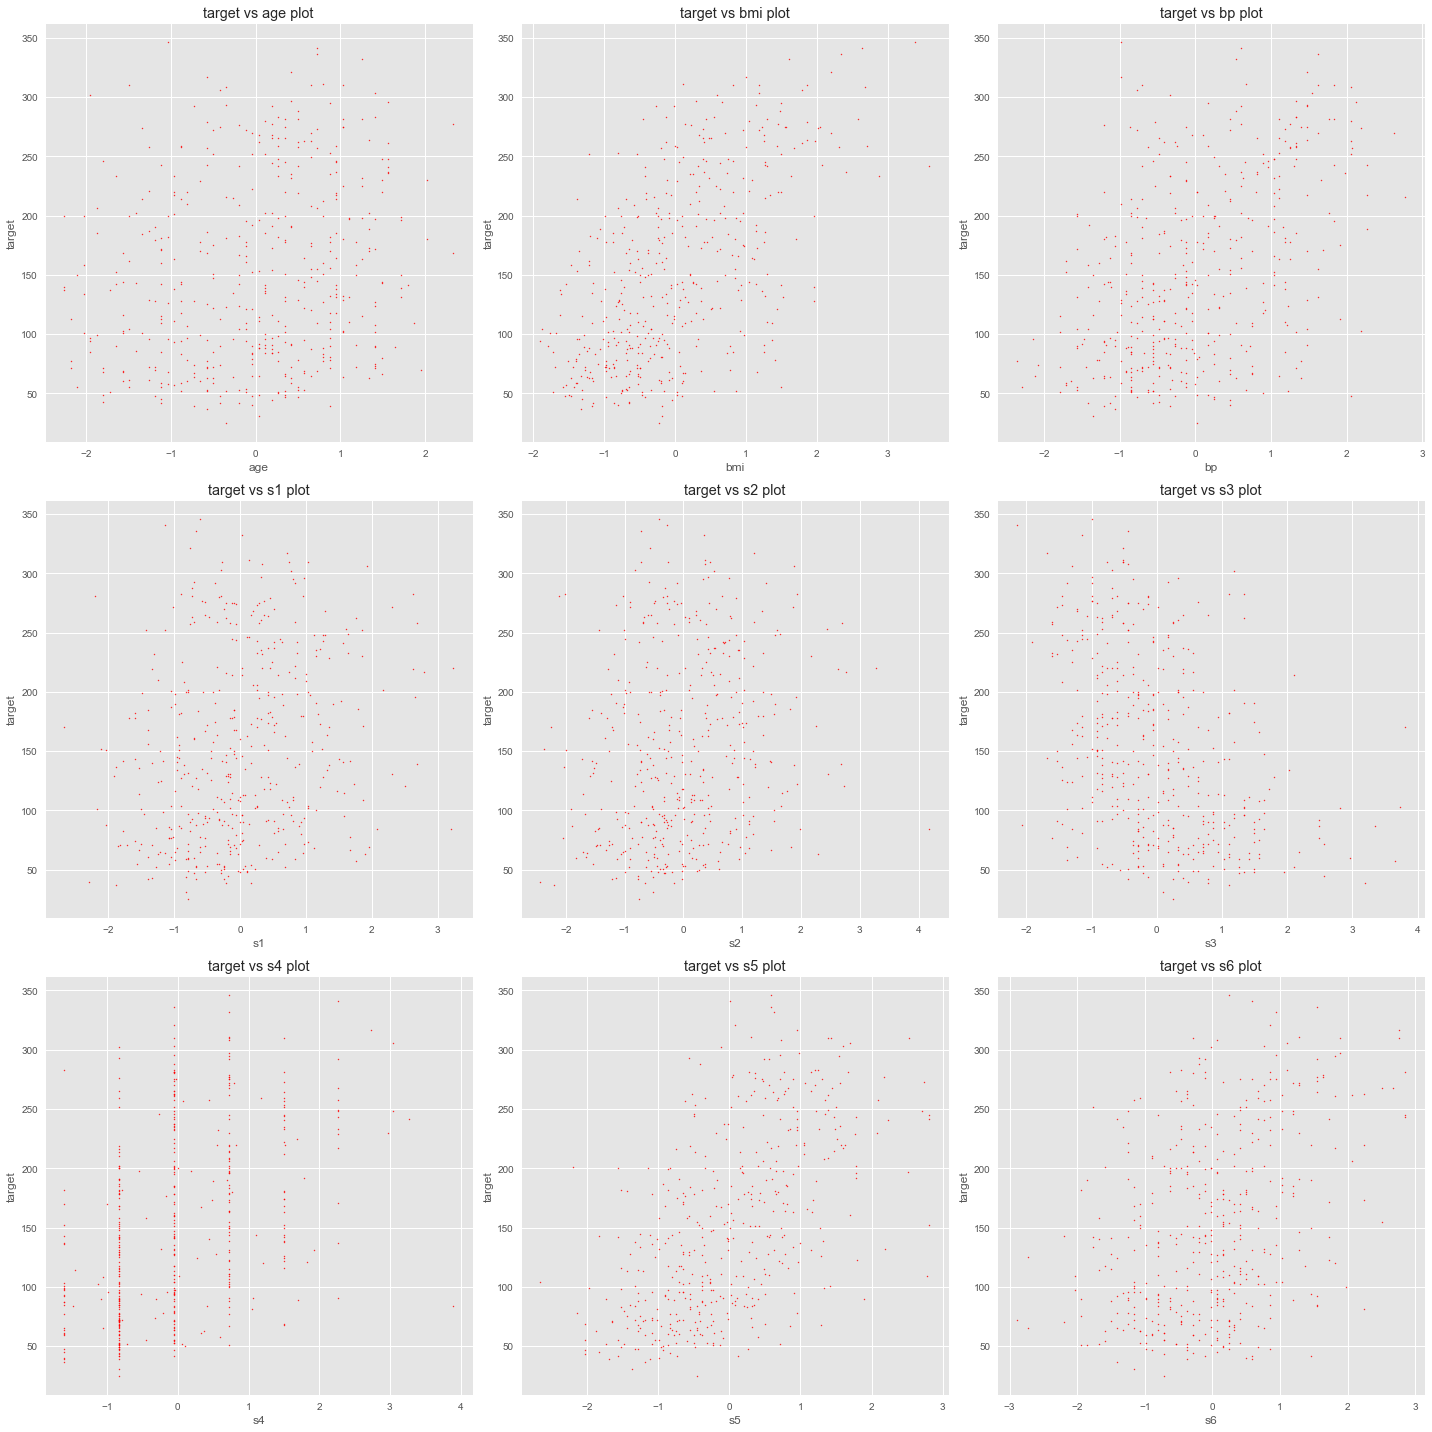

In [33]:
scatter_plot(Diabetes_scaled_df.drop(['sex'], axis=1), y_true, 3, 3)

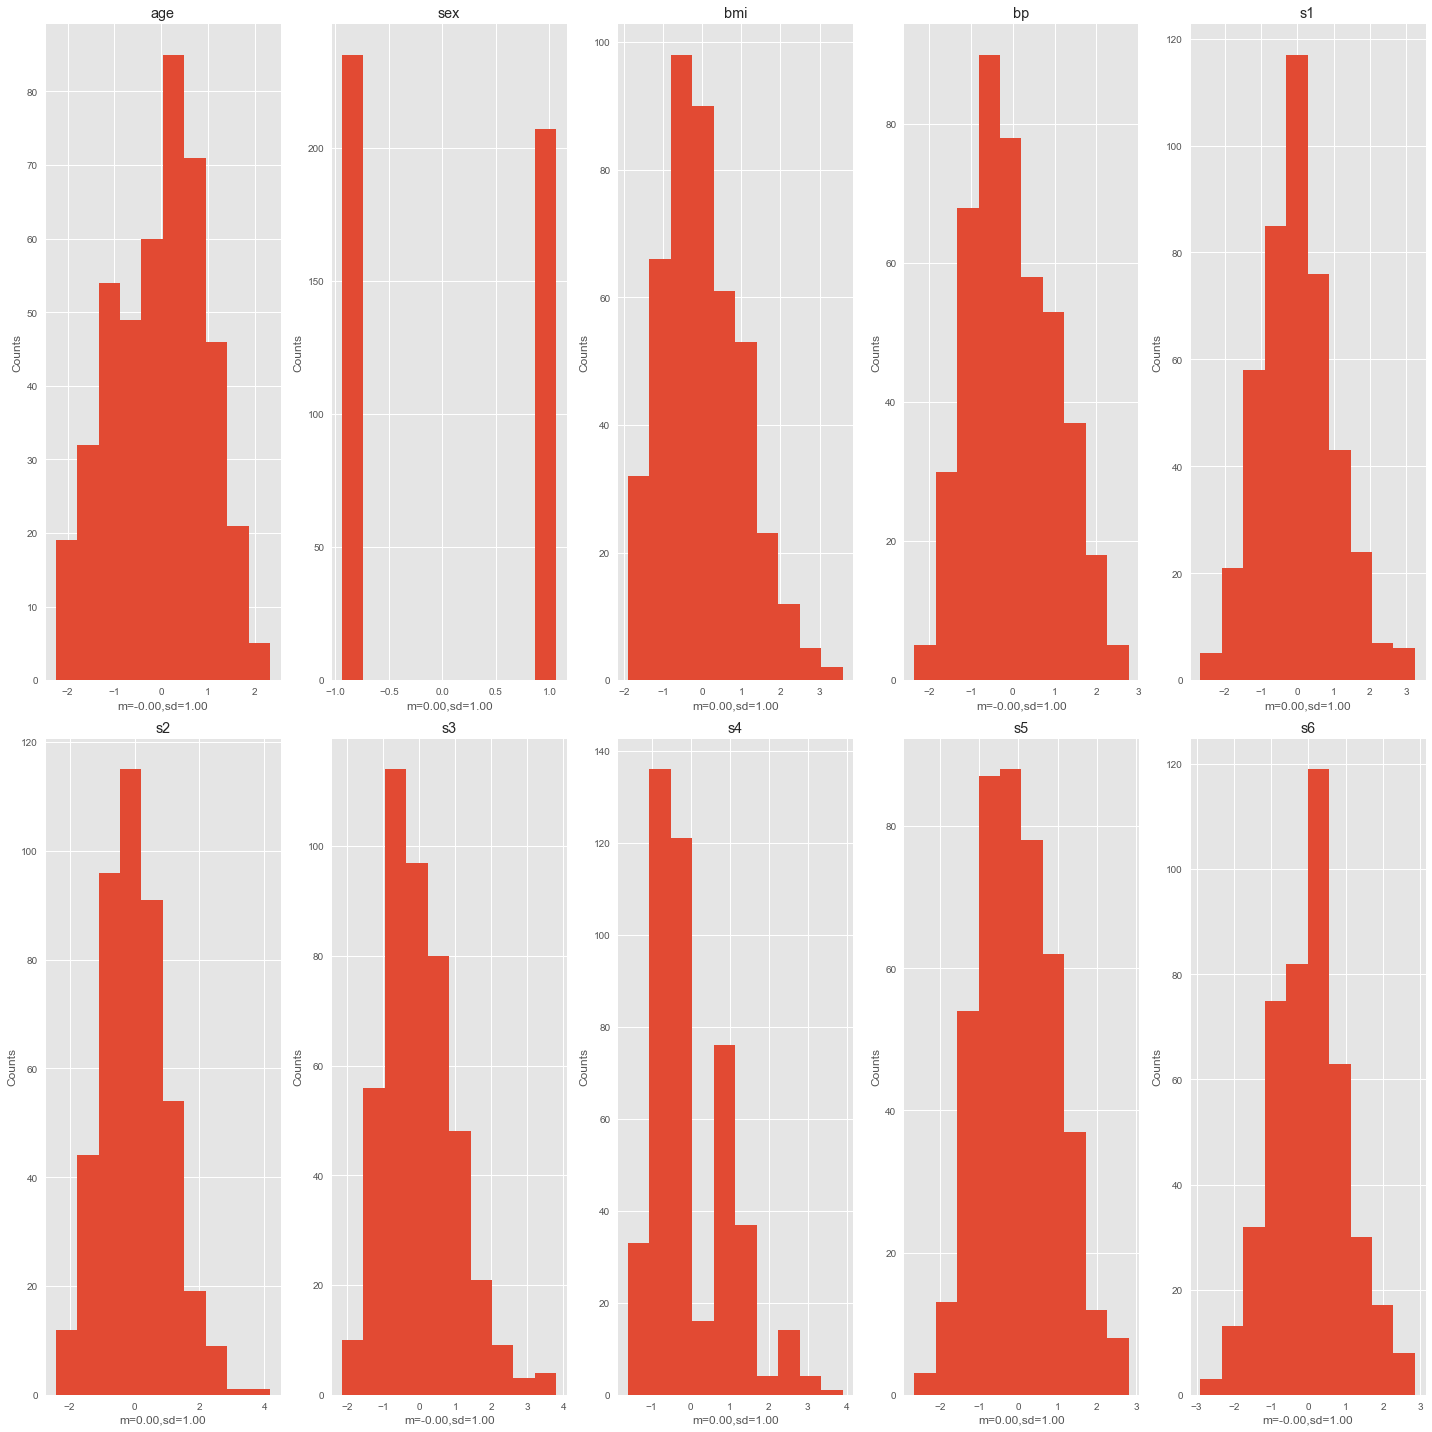

In [34]:
hist_plot(Diabetes_scaled_df, 2, 5)

In [35]:
len(Diabetes_scaled)

442

## 1. What is the variance (%) covered by the first 3 components? How is this percentage of variance computed?

First 3 components variance (%)

0.40 percentage of variance for n=1 

0.15 percentage of variance for n=2 

0.12 percentage of variance for n=3

In [36]:
pca = PCA(n_components=3)
pca.fit_transform(Diabetes_scaled)
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [49]:
print(f"{prop_var[0]:.2f} percentage of variance for n=1", f"\n{prop_var[1]:.2f} percentage of variance for n=2", f"\n{prop_var[2]:.2f} percentage of variance for n=3")

0.40 percentage of variance for n=1 
0.15 percentage of variance for n=2 
0.12 percentage of variance for n=3


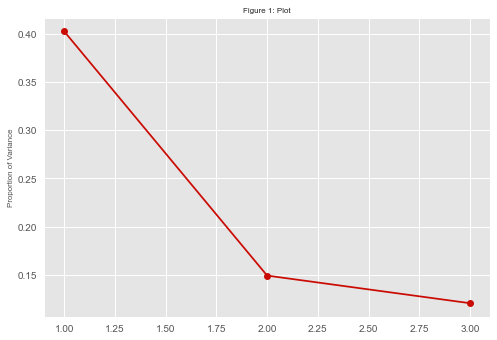

In [37]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

## 2. Is there any correlation between these three components?

I haven't understand what I have to do for this. So I haven't attempted.

In [38]:
pca = PCA(n_components=2)
PC = pca.fit_transform(Diabetes_scaled)
pca_diabetes = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_diabetes


,PC1,PC2
0,0.587199,-1.946832
1,-2.831625,1.372082
2,0.272129,-1.634901
3,0.049281,0.382278
4,-0.756421,0.811960
...,...,...
437,1.239525,-1.035968
438,1.264719,0.761319
439,-0.205206,-1.205487
440,0.692871,0.210127


In [39]:
fig = px.scatter(x=PC[:, 0], y=PC[:, 1], color=y_true)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

## 3. Apply t-SNE on the same dataset, select the first 3 components and plot them.

Yes. It's done.

In [52]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Diabetes_scaled)
tsne.kl_divergence_

0.8774340152740479

In [41]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y_true)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

# 4. Report the comparison between the results obtained using t-SNE and PCA

For t-SNE we can see it as two cluster data whereas for PCA we cannot see any cluster difference.